# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Jose Bustamante Guiral
*Métodos computacionales 2025-I*

---

# 1.

<center>

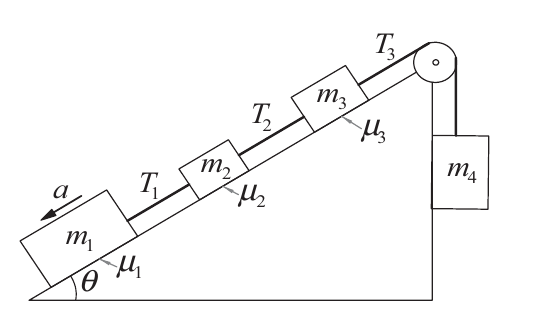

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [ ]:
#Aquí va su código
import numpy as np

# Datos
g = 9.81  # gravedad
theta = 45 * np.pi / 180  # conversión a radianes

# Masas
masa_1 = 10
masa_2 = 4
masa_3 = 5
masa_4 = 6

# Coeficientes de fricción
mu_1 = 0.25
mu_2 = 0.3
mu_3 = 0.2

# términos constantes
b1 = masa_1 * g * (np.sin(theta) - mu_1 * np.cos(theta))
b2 = masa_2 * g * (np.sin(theta) - mu_2 * np.cos(theta))
b3 = masa_3 * g * (np.sin(theta) - mu_3 * np.cos(theta))
b4 = -masa_4 * g

# Matriz
A = np.array([
    [1,  0,  0,  masa_1],
    [-1, 1,  0,  masa_2],
    [0, -1, 1,  masa_3],
    [0,  0, -1, masa_4]
])

# términos independientes
b = np.array([b1, b2, b3, b4])

# Resolver el sistema de ecuaciones
solucion = np.linalg.solve(A, b)

T_1 = solucion[0]
T_2 = solucion[1]
T_3 = solucion[2]
a  = solucion[3]

print('Resultados:')
print(f'T1 = {T_1} N')
print(f'T1 = {T_2} N')
print(f'T1 = {T_3} N')
print(f'a  = {a} m/s^2')



Resultados:
T1 = 35.89135719172326 N
T1 = 48.86055656372454 N
T1 = 68.54041454044618 N
a  = 1.6134024234076976 m/s^2


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

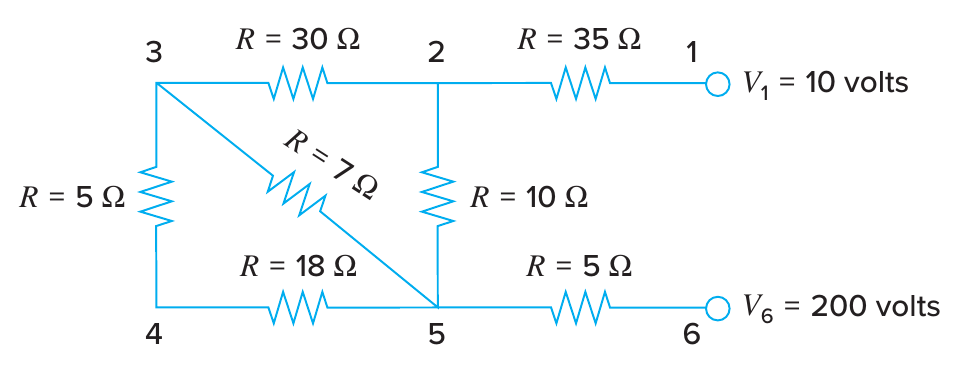


In [ ]:
#Aquí va su código
# Ecuaciones:
# 28*i12 + 60*i23 = 10   --> (1)
# 47*i12 - 7*i23 = 200   --> (2)

# Paso 1: despejamos una variable. Por ejemplo, de (1) despejamos i23
# 60*i23 = 10 - 28*i12
# i23 = (10 - 28*i12) / 60

import numpy as np

# Matriz de coeficientes A
A = np.array([
    [28, 60],
    [47, -7]
])

# términos independientes b
b = np.array([10, 200])

# Resolver el sistema lineal
solucion = np.linalg.solve(A, b)

# Extraer las corrientes principales
i12 = solucion[0]
i23 = solucion[1]

# Calcular las demás corrientes
i25 = i12 - i23
i34 = i23
i45 = i34
i56 = i12

print('Corrientes encontradas:')
print(f'i12 = {i12:5f} A')
print(f'i23 = {i23:5f} A')
print(f'i25 = {i25:5f} A')
print(f'i34 = {i34:5f} A')
print(f'i45 = {i45:5f} A')
print(f'i56 = {i56:5f} A')


Corrientes encontradas:
i12 = 4.001989 A
i23 = -1.700928 A
i25 = 5.702918 A
i34 = -1.700928 A
i45 = -1.700928 A
i56 = 4.001989 A


# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


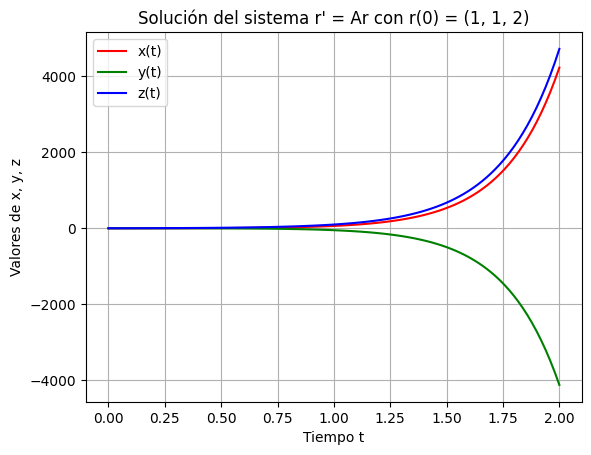

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Matriz A
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

# r(0)
r_0 = np.array([1, 1, 2])

# Diagonalizamos A
valores, vectores = np.linalg.eig(A)
D = np.diag(valores)                  # Matriz diagonal D
U = vectores
U_inv = np.linalg.inv(U)             # Inversa de U

t_lista = np.linspace(0, 2, 100)

# x(t), y(t), z(t)
x_lista = []
y_lista = []
z_lista = []

for t in t_lista:
    exp_Dt = np.diag(np.exp(valores * t)) # e^{D t} como una matriz diagonal
    exp_At = U @ exp_Dt @ U_inv # e^{A t} usando U e^{D t} U^{-1}
    rt = exp_At @ r_0

    x_lista.append(rt[0])
    y_lista.append(rt[1])
    z_lista.append(rt[2])

plt.plot(t_lista, x_lista, label='x(t)', color='red')
plt.plot(t_lista, y_lista, label='y(t)', color='green')
plt.plot(t_lista, z_lista, label='z(t)', color='blue')

plt.xlabel('Tiempo t')
plt.ylabel('Valores de x, y, z')
plt.title("Solución del sistema r' = Ar con r(0) = (1, 1, 2)")
plt.grid()
plt.legend()
plt.show()


# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [8]:
#Aquí va su código
import numpy as np

gamma = 2           # razón giromagnética
hbarra = 1            # usamos ℏ = 1 para simplificar
Bz = 1              # campo magnético en la dirección z
Bx = 0
By = 0

# Hamiltoniano H
factor = -gamma * hbarra / 2
H = factor * np.array([
    [Bz, Bx - 1j * By],
    [Bx + 1j * By, -Bz]
])


print(f'Hamiltoniano H: {H}')

# si H es hermítico (H == H†)
hermitico = np.allclose(H, H.conj().T)
print(f'H es hermítico?: {hermitico}')

# autovalores y autovectores
valores, vectores = np.linalg.eig(H)

print('Niveles de energía permitidos (autovalores):')
print(valores)

print('Autovectores (columnas):')
print(vectores)

# normalización de autovectores
print('Normas de los autovectores:')
for i in range(vectores.shape[1]):
    norma = np.linalg.norm(vectores[:, i])
    print(f"Vector {i+1}: norma = {norma:.2f}")


Hamiltoniano H: [[-1.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j]]
H es hermítico?: True
Niveles de energía permitidos (autovalores):
[-1.+0.j  1.-0.j]
Autovectores (columnas):
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Normas de los autovectores:
Vector 1: norma = 1.00
Vector 2: norma = 1.00


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

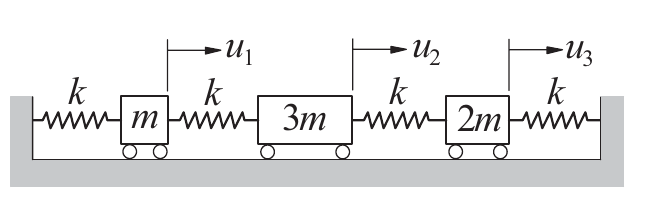
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [16]:
import numpy as np

# Matriz
K = np.array([
    [ 2, -1,  0],
    [-1,  2, -1],
    [ 0, -1,  1]
])

M = np.diag([1, 3, 2])  # M dividido entre m

# K u = w^2 M u en: A u = λ u, donde A = M⁻¹ K
M_inv = np.linalg.inv(M)
A = M_inv @ K

autovalores, autovectores = np.linalg.eig(A)

# ω = sqrt(autovalores)
omega = np.sqrt(np.real(autovalores))
indices = np.argsort(omega)
omega = omega[indices]
autovectores = autovectores[:, indices]

print('Frecuencias naturales ω')
for i, w in enumerate(omega):
    print(f'ω{i+1} = {w:.4f}')

print('Formas modales')
for i in range(3):
    vec = autovectores[:, i]
    vec = vec / np.linalg.norm(vec)  # Normalizar
    print(f'Modo {i+1}:', vec.round(4))


Frecuencias naturales ω
ω1 = 0.2965
ω2 = 0.9226
ω3 = 1.4925
Formas modales
Modo 1: [0.3156 0.6035 0.7322]
Modo 2: [-0.4474 -0.514   0.7319]
Modo 3: [-0.9731  0.2215 -0.0641]
